<a href="https://colab.research.google.com/github/PhaTanVu/Homework-fuzzy-logic/blob/main/TIPPING_IN_RESTAURANT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np

In [ ]:
import skfuzzy as fuzz

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np 
import skfuzzy.control as ctrl

universe = np.linspace(0, 10, 61)
universe1 = np.linspace (10, 31, 61)

food = ctrl.Antecedent(universe, 'food')
service = ctrl.Antecedent(universe, 'service')
tip = ctrl.Consequent(universe1, 'tip')
# Chúng ta dät VP: Very Poor, P: Poor, AV; Average, G: Goog, VG: very Goog
names = ['VP', 'P', 'AV', 'G', 'VG']
food.automf (names=names)
service.automf (names=names)
tip.automf(names=names)

In [ ]:
rule0 = ctrl.Rule(antecedent= ((food['VP'] & service ['VP']) |
(food['P'] & service['VP']) |
(food[ 'VP'] & service['P'])),
consequent=tip['VP'], label='rule VP')
rule1 = ctrl.Rule(antecedent=((food['VP'] & service['AV']) |
(food['VP'] & service[ 'G']) |
(food['P'] & service['P']) |
(food['P'] & service['AV']) |
(food['AV'] & service['P']) |
(food['AV'] & service['VP']) |
(food['G'] & service['VP'])),
consequent=tip['P'], label='rule P')
rule2 = ctrl.Rule(antecedent=((food['VP'] & service['VG']) |
(food['P'] & service['G']) | 
(food['AV'] & service['AV']) | 
(food['G'] & service['P']) | 
(food[ 'VG'] & service[ 'VP'])),
consequent=tip['AV'], label='rule AV')
rule3 = ctrl.Rule(antecedent=((food['P'] & service['VG']) |
(food['AV'] & service['VG']) | 
(food ['AV'] & service['G']) | 
(food[ 'G'] & service['G']) | 
(food[ 'G'] & service['AV']) | 
(food['VG'] & service['AV']) | 
(food[ 'VG'] & service['P'])),
consequent=tip['G'], label='rule G')
rule4 = ctrl.Rule(antecedent=((food['G'] & service['VG']) |
(food ['VG'] & service['VG']) | (food['VG'] & service['G'])),
consequent=tip['VG'], label='rule VG')

In [ ]:
system = ctrl.ControlSystem(rules=[rule0, rule1, rule2, rule3, rule4])

In [ ]:
sim = ctrl.ControlSystemSimulation(system, flush_after_run=61 * 61 + 1)

<ipython-input-40-bd89bb0fe2a6>:21: UserWarning: The following kwargs were not used by contour: 'dir'
  cset = ax.contourf(x, y, z, dir='z', offset=9, cmap='viridis', alpha=0.5)
<ipython-input-40-bd89bb0fe2a6>:22: UserWarning: The following kwargs were not used by contour: 'dir'
  cset = ax.contourf(x, y, z, dir='x', offset=11, cmap='viridis', alpha=0.5)
<ipython-input-40-bd89bb0fe2a6>:23: UserWarning: The following kwargs were not used by contour: 'dir'
  cset = ax.contourf(x, y, z, dir='y', offset=11, cmap='viridis', alpha=0.5)


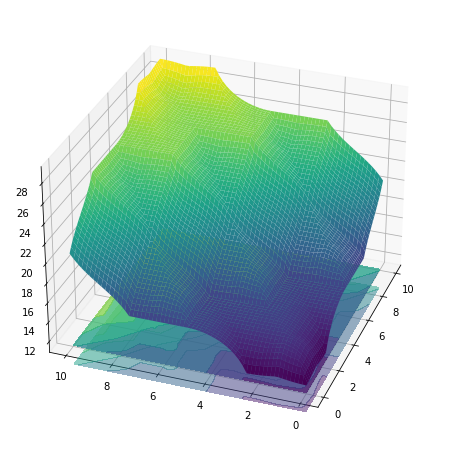

In [ ]:
upsampled = np.linspace(0, 10, 61)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

for i in range (61):
  for j in range(61):
    sim.input['food'] = x[i, j]
    sim.input['service'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot (111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, dir='z', offset=9, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, dir='x', offset=11, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, dir='y', offset=11, cmap='viridis', alpha=0.5)
ax.view_init(30, 200)